In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics

In [20]:
train_X, train_y, test_X, test_y = load_svhn("data", 10000, 1000)

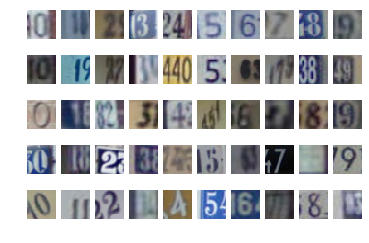

In [8]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

In [21]:
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 3*3*32]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [33]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=12)
knn_classifier.fit(binary_train_X, binary_train_y)

In [34]:
predictions = knn_classifier.predict(binary_test_X)

In [35]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [36]:
print(classification_report(binary_test_y, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70        68
           1       0.75      0.57      0.65        76

   micro avg       0.67      0.67      0.67       144
   macro avg       0.69      0.68      0.67       144
weighted avg       0.69      0.67      0.67       144



In [37]:
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(binary_test_y.astype(np.float32).astype(int), probs)
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()

In [43]:
perfect_classifier = (binary_test_y.astype(np.float32)).astype(int)

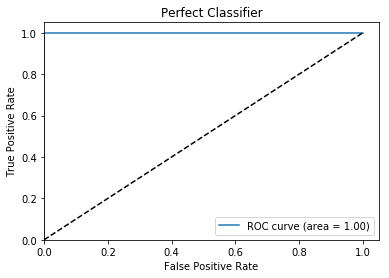

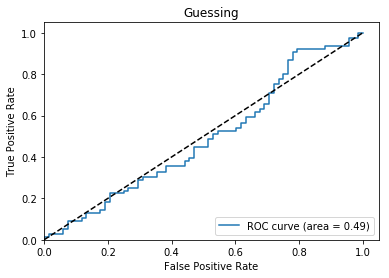

In [44]:
plot_roc("Perfect Classifier", perfect_classifier)
plot_roc("Guessing", np.random.uniform(0, 1, len(perfect_classifier)))

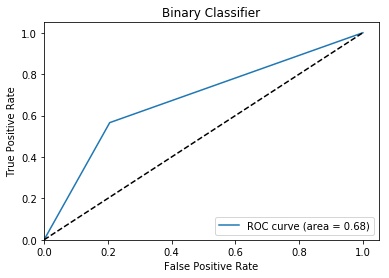

In [45]:
plot_roc("Binary Classifier", predictions.astype(np.float32).astype(int))

In [46]:
binary_classification_metrics(predictions, binary_test_y)

(0.7941176470588235,
 0.6206896551724138,
 0.6967741935483871,
 0.6736111111111112)